In [13]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = "/Users/lukasrane/Desktop/Grenoble INP/Labworks/TPM2-2020-2021/ST1-ST2-15uM-2019-10-07/scan1.dat"
df = pd.read_csv(file,names = ['T','P', 'Time'],skiprows = 2, skipfooter=4, )

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


In [14]:
 T = np.array(df['T'])
P = np.array(df['P'])

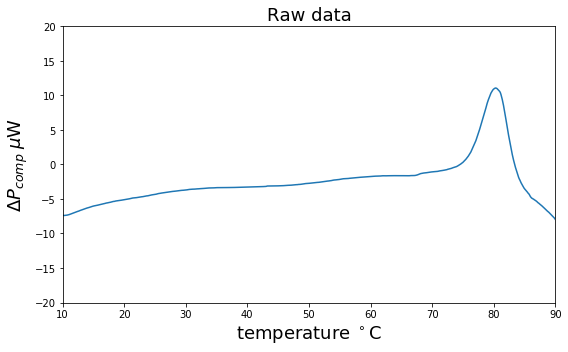

In [33]:
 fig1 = plt.figure(1,figsize=(8,8/1.6))
plt.title("Raw data",size=18)
ax111 = fig1.add_subplot(111)
plt.plot(T,P,'-')
plt.xlabel(r"temperature $^\circ$C",size=18)
plt.ylabel(r"$\Delta P_{comp}\;\mu\mathrm{W}$",size=18)
plt.xlim(10,90) # you can comment and adjust these lines to adjust the correct␣
plt.ylim(-20,20)
plt.tight_layout()
fig1.savefig("Loop4_raw.png")

In [34]:
def LT_backgrd(p,T):
    """ low temperature polynamial to fit the data"""
    return p[0] + p[1] * T + p[2]*T**2 + p[3]*T**3
def LT_error(p,T,Power):
    """Error function to fit bckgrd at HT"""
    return Power - LT_backgrd(p,T)
def HT_backgrd(p,T):
    """ high temperature polynamial to fit the data"""
    return p[0] + p[1] * T + p[2]*T**2 + p[3]*T**3
def HT_error(p,T,Power):
    """Error function to fit bckgrd at HT""" 
    return Power - HT_backgrd(p,T)
from scipy import optimize
from scipy import interpolate
# selection of the LT data
T0=20.0
T1=50.0
LT_select =np.where((T>T0)&(T<T1))
LT_T = T[LT_select]
LT_P = P[LT_select]
LT_p0 = np.array([5,-0.010,0.0,0.0])
LT_p1 = optimize.leastsq(LT_error, LT_p0, args=(LT_T,LT_P))
# selection of the HT data
T2 = 85.0
T3 = 90.0
HT_select =np.where((T>T2)&(T<T3))
HT_T = T[HT_select]

In [42]:
HT_P = P[HT_select]
HT_p0 = np.array([5,-0.010,0.0,0.0])
HT_p1 = optimize.leastsq(HT_error, HT_p0, args=(HT_T,HT_P))
T_background = np.append(LT_T,HT_T)
P_background = np.append(LT_backgrd(LT_p1[0],LT_T),HT_backgrd(HT_p1[0],HT_T) )
background_Loop4 =  interpolate.interp1d(T_background,P_background,
    kind='cubic', fill_value="extrapolate")
gamma = 1.0/60
V0 = 300
C0 = 8.5e-6
DeltaC = (P-background_Loop4(T))/gamma /(V0*C0)
T1 = 30.0
T2 = 90.0
select = np.where((T>T1)&(T<T2))
T_select = T[select]
DeltaC_select = DeltaC[select]

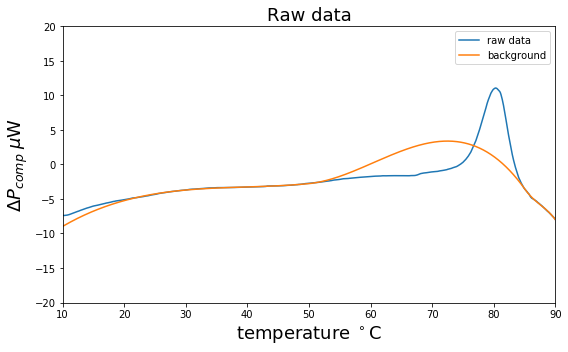

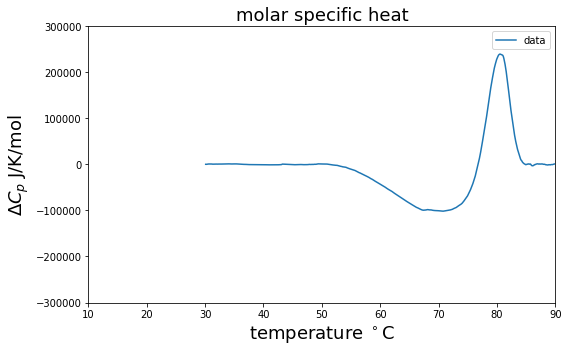

In [49]:
 fig2 = plt.figure(2,figsize=(8,8/1.6))
plt.title("Raw data",size=18)
ax211 = fig2.add_subplot(111)
plt.plot(T,P,'-',label="raw data")
plt.plot(T, background_Loop4(T) ,'-',label ="background")
plt.xlabel(r"temperature $^\circ$C",size=18)
plt.ylabel(r"$\Delta P_{comp}\;\mu\mathrm{W}$",size=18)
plt.xlim(10,90) # you can comment and adjust these lines to adjust the correct␣
plt.ylim(-20,20) #
plt.legend()
plt.tight_layout()
fig3 = plt.figure(3,figsize=(8,8/1.6))
plt.title("molar specific heat",size=18)
ax311 = fig3.add_subplot(111)
plt.plot(T_select,DeltaC_select,'-',label="data")
plt.xlabel(r"temperature $^\circ$C",size=18)
plt.ylabel(r"$\Delta C_{p}\;\mathrm{J/K/mol}$",size=18)
plt.xlim(10,90) # you can comment and adjust these lines to adjust the correct␣
plt.ylim(-30e4,30e4)
plt.legend()
plt.tight_layout()

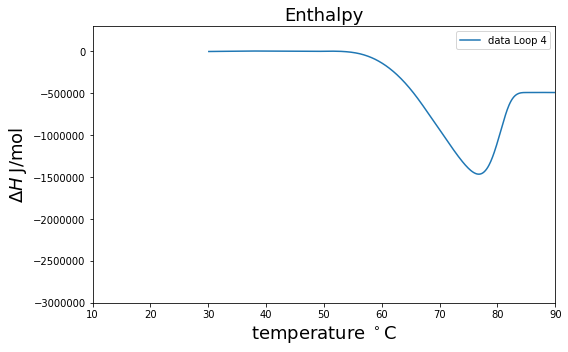

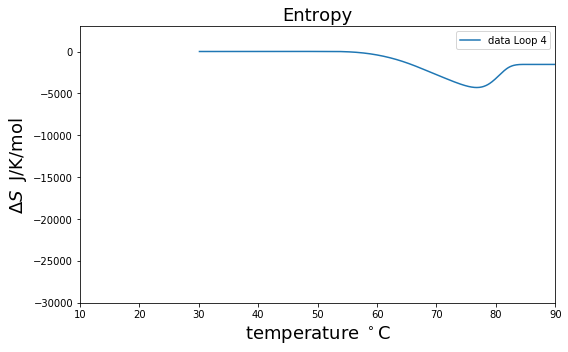

In [53]:
from scipy import integrate
z = np.array([0])
H = np.append(z, integrate.cumtrapz(DeltaC_select, T_select))
S = np.append(z, integrate.cumtrapz(DeltaC_select/(273.15+T_select),T_select))
fig4 = plt.figure(4,figsize=(8,8/1.6))
plt.title("Enthalpy",size=18)
ax411 = fig4.add_subplot(111)
plt.plot(T_select,H,'-',label="data Loop 4")
plt.xlabel(r"temperature $^\circ$C",size=18)
plt.ylabel(r"$\Delta H\;\mathrm{J/mol}$",size=18)
plt.xlim(10,90) # you can comment and adjust these lines to adjust the correct␣
plt.ylim(-30e5,30e4)
plt.legend()
plt.tight_layout()
fig5 = plt.figure(5,figsize=(8,8/1.6))
plt.title("Entropy",size=18)
ax511 = fig5.add_subplot(111)
plt.plot(T_select,S,'-',label="data Loop 4")
plt.xlabel(r"temperature $^\circ$C",size=18)
plt.ylabel(r"$\Delta S\;\;\mathrm{J/K/mol}$",size=18)
plt.xlim(10,90) # you can comment and adjust these lines to adjust the correct␣
plt.ylim(-30e3,30e2)
plt.legend()
plt.tight_layout()

In [48]:
Delta_S = S[-20:-1].mean()
Delta_Scal = Delta_S/4.185
Delta_H = H[-20:-1].mean()
Delta_Hkcal = Delta_H/4185
print("the entropy différence between the melted state and the hybridized state, is Delta S = %f J/K/mol"%(Delta_S))
print("the entalpy différence between the melted state and the hybridized state, is Delta H = %f J/mol"%(Delta_H))
print("the entropy différence between the melted state and the hybridized state, is Delta S = %f cal/K/mol"%(Delta_Scal))
print("the entalpy différence between the melted state and the hybridized state, is Delta H = %f kcal/mol"%(Delta_Hkcal))

the entropy différence between the melted state and the hybridized state, is Delta S = -1543.986576 J/K/mol
the entalpy différence between the melted state and the hybridized state, is Delta H = -490199.441159 J/mol
the entropy différence between the melted state and the hybridized state, is Delta S = -368.933471 cal/K/mol
the entalpy différence between the melted state and the hybridized state, is Delta H = -117.132483 kcal/mol
